<a href="https://colab.research.google.com/github/Crisrioja/Metodos-numericos/blob/main/Comparacion_de_interpolaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Polinomio de Lagrange ===
                  8                         7                     6            ↪
53.6893005545836⋅x  - 1.77635683940025e-15⋅x  - 102.815010562028⋅x  - 1.421085 ↪

↪              5                     4                         3               ↪
↪ 4715202e-14⋅x  + 61.3672060920176⋅x  + 8.88178419700125e-15⋅x  - 13.20303454 ↪

↪       2                               
↪ 6112⋅x  + 2.22044604925031e-16⋅x + 1.0

=== Polinomio de Newton ===
                  8                     6                     4                ↪
53.6893005545836⋅x  - 102.815010562028⋅x  + 61.3672060920175⋅x  + 3.5527136788 ↪

↪          3                    2      
↪ 005e-15⋅x  - 13.203034546112⋅x  + 1.0

=== Polinomio de Hermite ===
                  16                     14                         13         ↪
2882.54099404041⋅x   - 10924.8303674132⋅x   + 1.37769611629509e-12⋅x   + 16718 ↪

↪              12                         11                    10             ↪
↪ .8458607217⋅x 

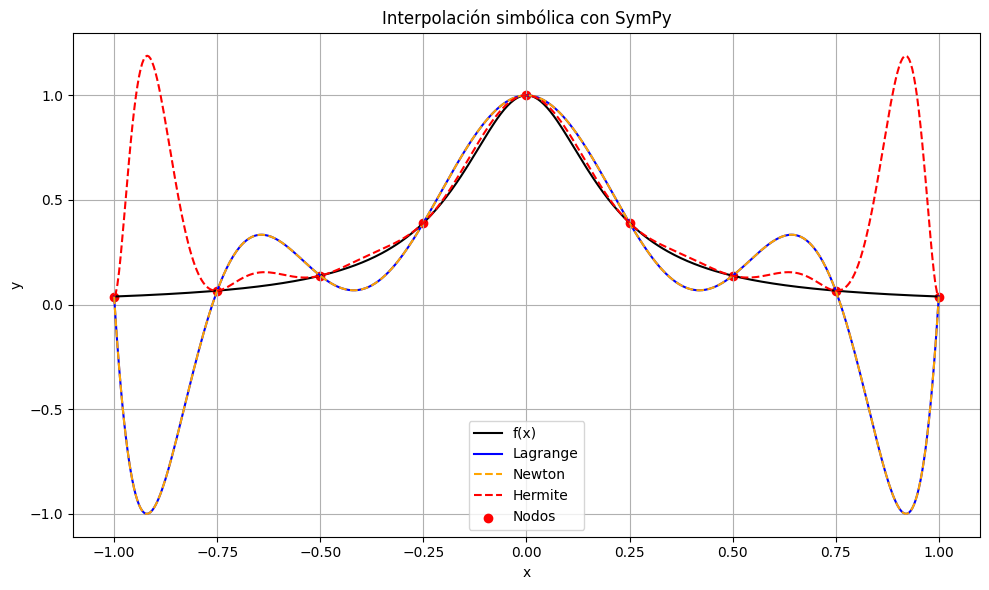

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x')


# Nodos y función
#nodosx = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
nodosx = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
nodosfx = [1 / (1 + 25 * xi**2) for xi in nodosx]

# Derivada simbólica de f(x)
f_expr = 1 / (1 + 25 * x**2)
df_expr = sp.diff(f_expr, x)
dnodosfx = [df_expr.subs(x, xi) for xi in nodosx]


# 1. LAGRANGE

def lagrange(x_vals, y_vals):
    n = len(x_vals)
    L = 0
    for i in range(n):
        xi, yi = x_vals[i], y_vals[i]
        li = 1
        for j in range(n):
            if i != j:
                li *= (x - x_vals[j]) / (xi - x_vals[j])
        L += yi * li
    return sp.simplify(L)


# 2. NEWTON (con diferencias divididas)

def diferenciasdiv(x_vals, y_vals):
    n = len(x_vals)
    table = [list(y_vals)]
    for level in range(1, n):
        row = []
        for i in range(n - level):
            num = table[level - 1][i + 1] - table[level - 1][i]
            den = x_vals[i + level] - x_vals[i]
            row.append(num / den)
        table.append(row)
    return [table[i][0] for i in range(n)]  # Coeficientes a_i

def newton(x_vals, y_vals):
    a = diferenciasdiv(x_vals, y_vals)
    n = len(x_vals)
    poly = a[0]
    prod = 1
    for i in range(1, n):
        prod *= (x - x_vals[i - 1])
        poly += a[i] * prod
    return sp.simplify(poly)


# 3. HERMITE

def hermite(x_vals, y_vals, dy_vals):
    n = len(x_vals)
    z = []
    Q = []

    for i in range(n):
        z += [x_vals[i], x_vals[i]]
        Q.append([y_vals[i]])
        Q.append([y_vals[i]])

    for i in range(1, 2 * n):
        for j in range(1, i + 1):
            if z[i] == z[i - j]:
                val = dy_vals[i // 2]
            else:
                val = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])
            Q[i].append(val)

    H = Q[0][0]
    prod = 1
    for i in range(1, 2 * n):
        prod *= (x - z[i - 1])
        H += Q[i][i] * prod
    return sp.simplify(H)


# Construir polinomios

P_lagrange = lagrange(nodosx, nodosfx)
P_newton = newton(nodosx, nodosfx)
P_hermite = hermite(nodosx, nodosfx, dnodosfx)

# Mostrar polinomios simbólicos
print("=== Polinomio de Lagrange ===")
sp.pprint(P_lagrange)

print("\n=== Polinomio de Newton ===")
sp.pprint(P_newton)

print("\n=== Polinomio de Hermite ===")
sp.pprint(P_hermite)


# Evaluar funciones numéricamente

f_lambd = sp.lambdify(x, f_expr, 'numpy')
lag_lambd = sp.lambdify(x, P_lagrange, 'numpy')
newton_lambd = sp.lambdify(x, P_newton, 'numpy')
hermite_lambd = sp.lambdify(x, P_hermite, 'numpy')

x_vals = np.linspace(-1, 1, 500)


# Gráfica

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_lambd(x_vals), label="f(x)", color='black')
plt.plot(x_vals, lag_lambd(x_vals), '-', label="Lagrange", color='blue')
plt.plot(x_vals, newton_lambd(x_vals), '--', label="Newton", color='orange')
plt.plot(x_vals, hermite_lambd(x_vals), '--', label="Hermite", color='red')
plt.scatter(nodosx, nodosfx, color='red', label='Nodos')
plt.title("Interpolación simbólica con SymPy")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()